# Thống kê mô tả (Phần 2)

(Các thống kê tóm tắt dữ liệu - summary statistics)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Bộ dữ liệu `Iris Data Set`

In [2]:
iris = pd.read_csv("iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
iris

FileNotFoundError: [Errno 2] No such file or directory: 'iris.data'

## Giới thiệu



Trong **Thống kê Mô tả** (Descriptive Statistics), bên cạnh **trực quan hóa dữ liệu** (data visualization) các **số đo tóm tắt dữ liệu** (summary statistic) cũng hay được dùng để khám phá (explore) và mô tả (describe) dữ liệu.

Numpy, pandas, scipy hỗ trợ đầy đủ việc tính toán các số đo này.

## Trung bình

**Trung bình** (mean) là giá trị trung bình cộng của các dữ liệu. Số đo trung bình phản ánh "trọng tâm" của dữ liệu.

In [ ]:
np.mean(iris.sepal_length)

5.843333333333334

In [ ]:
iris.sepal_length.mean()

5.843333333333334

In [ ]:
iris.sepal_length.sum() / iris.sepal_length.size

5.843333333333334

Giá trị trung bình rất "nhạy cảm" với **ngoại lai** (outlier), là các dữ liệu rất lớn hay rất nhỏ so với phần còn lại của dữ liệu. 

In [ ]:
x = np.random.rand(50)
x.mean()

0.43340113269462854

In [ ]:
x_with_outliers = np.append(x, [10])
x_with_outliers.mean()

0.6209815026417926

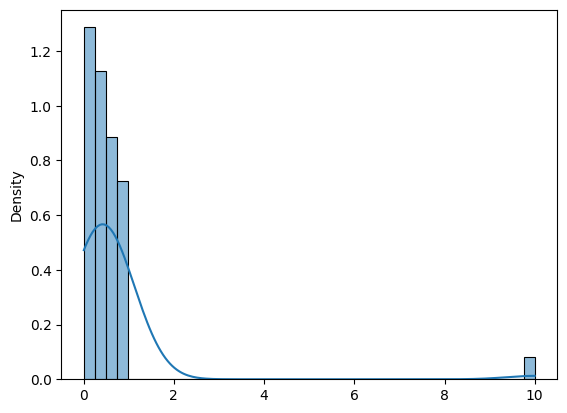

In [ ]:
sns.histplot(x_with_outliers, stat="density", kde=True)
plt.show()

In [3]:
sns.histplot(x, stat="density", kde=True)
plt.show()

NameError: name 'x' is not defined

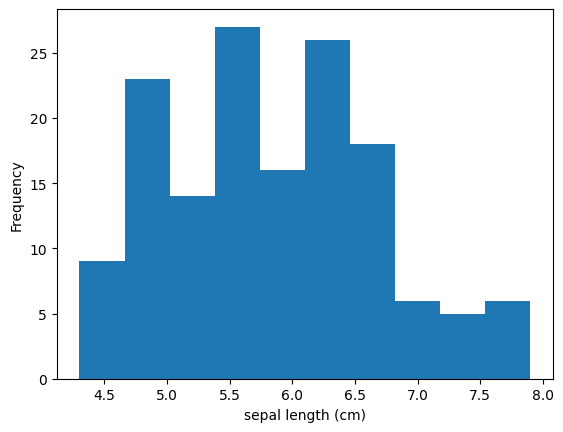

In [ ]:
iris.sepal_length.plot.hist()
plt.xlabel("sepal length (cm)")
plt.show()

Histogram có thể được dùng để kiểm tra dữ liệu có ngoại lai hay không. Nếu dữ liệu có ngoại lai thì không nên dùng trung bình.

**Bài tập**. Dùng histogram kiểm tra xem sepal_width, petal_length, petal_width có ngoại lai hay không? Nếu không thì tính trung bình các đặc trưng này.

## Trung vị

**Trung vị** (median) là giá trị "ở giữa" của dữ liệu.

In [ ]:
np.median(iris.sepal_length)

5.8

In [ ]:
iris.sepal_length.median()

5.8

In [ ]:
np.sort(iris.sepal_length)[iris.sepal_length.size // 2]

5.8

Giá trị trung vị có "tính kháng" mạnh các ngoại lai. 

In [ ]:
np.median(x)

0.35456421739761695

In [ ]:
np.median(x_with_outliers)

0.36295625868472137

## Yếu vị

In [ ]:
ages = np.random.randint(10, 21,  100)
ages[:5]

array([18, 10, 18, 12, 16])

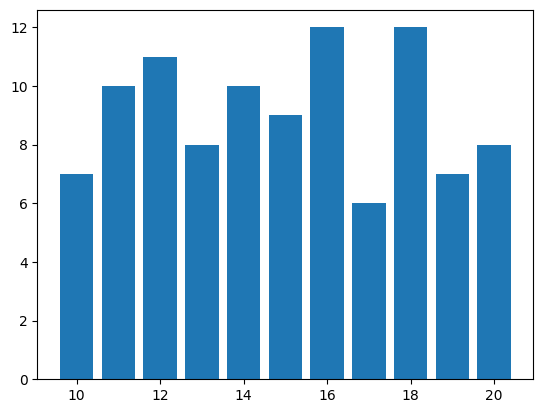

In [ ]:
age_groups, age_counts = np.unique(ages, return_counts=True)
plt.bar(age_groups, age_counts)
plt.show()

**Yếu vị** (mode) là giá trị "phổ biến" nhất của dữ liệu, tức là giá trị có tần số lớn nhất.

In [ ]:
age_groups[age_counts == max(age_counts)]

array([16, 18])

Có thể dùng module [`statistics`](https://docs.python.org/3/library/statistics.html#module-statistics) trong thư viện chuẩn của Python để tính mode (cũng như các giá trị tóm tắt khác).

In [ ]:
import statistics as st

st.mode(ages)

18

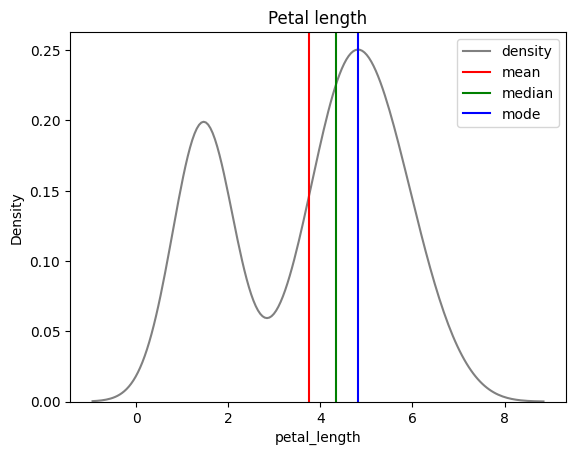

In [ ]:
ptlength = iris.petal_length

ax = sns.kdeplot(ptlength, color="gray", label="density")
kde_x, kde_y = ax.get_lines()[0].get_data()

plt.axvline(ptlength.mean(), color="red", label="mean")
plt.axvline(ptlength.median(), color="green", label="median")
plt.axvline(kde_x[np.argmax(kde_y)], color="blue", label="mode")

plt.legend()
plt.title("Petal length")
plt.show()

Dữ liệu gợi ý sự phân nhóm và ta nên phân tích trên từng nhóm!

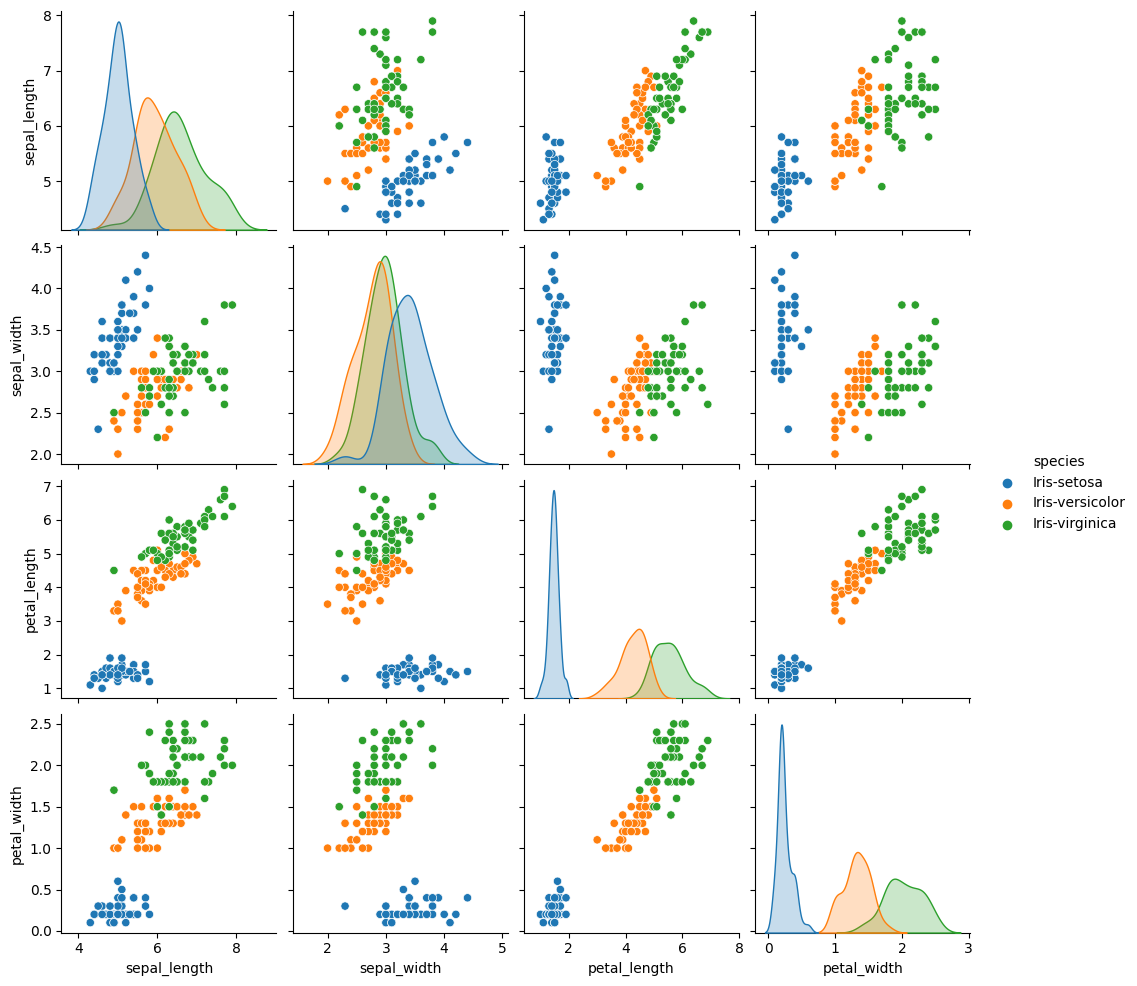

In [ ]:
sns.pairplot(iris, hue="species")
plt.show()

**Bài tập**. Tính trung vị của các đặc trưng trong bộ dữ liệu Iris và so sánh với trung bình.

## Phạm vi

**Phạm vi** (range) cho thấy "độ rộng" của dữ liệu.

In [ ]:
iris.sepal_length.max() - iris.sepal_length.min()

3.6000000000000005

Giá trị phạm vi rất "nhạy cảm" với ngoại lai.

In [ ]:
np.max(x) - np.min(x)

0.9745761345380508

In [ ]:
np.max(x_with_outliers) - np.min(x_with_outliers)

9.995985655144043

## Phân vị

Các **tứ phân vị** (quartile) là các giá trị chia các nhóm 1/4 của dữ liệu (sau khi sắp tăng dần).

In [ ]:
np.percentile(iris.sepal_length, [25, 50, 75])

array([5.1, 5.8, 6.4])

In [ ]:
iris.sepal_length.quantile([0.25, 0.50, 0.75])

0.25    5.1
0.50    5.8
0.75    6.4
Name: sepal_length, dtype: float64

**Khoảng tứ phân vị** (interquartile range, IQR) là khoảng cách giữa **tứ phân vị trên** (upper quartile) và **tứ phân vị dưới** (lower quartile).

In [ ]:
lower_quartile, upper_quartile = np.percentile(iris.sepal_length, [25, 75])
IQR = upper_quartile - lower_quartile
IQR

1.3000000000000007

Khoảng tứ phân vị có "tính kháng" mạnh các ngoại lai. 

**Biểu đồ hộp** (boxplot) mô tả dữ liệu theo các tứ phân vị

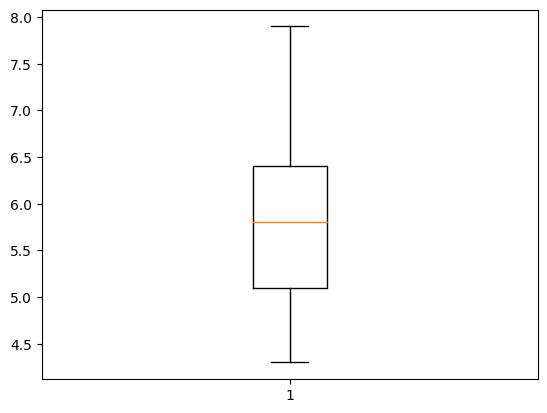

In [ ]:
plt.boxplot(iris.sepal_length)
plt.show()

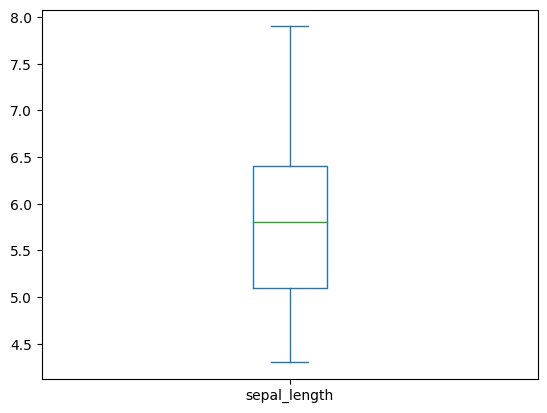

In [ ]:
iris.sepal_length.plot.box()
plt.show()

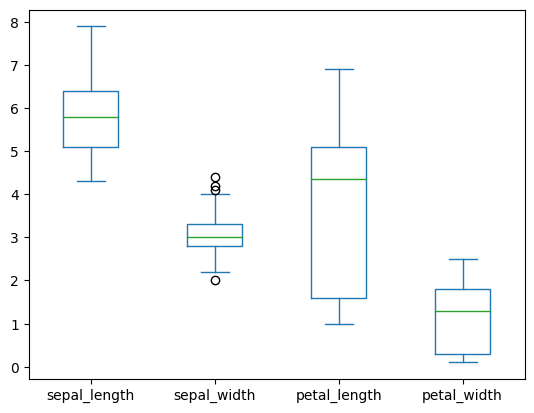

In [ ]:
iris.plot.box()
plt.show()

Biểu đồ hộp cũng cho thấy các điểm dữ liệu "được cho là" ngoại lai (hiển thị bởi các chấm tròn).

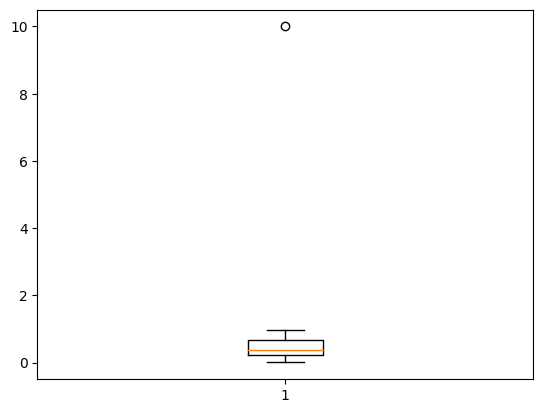

In [ ]:
plt.boxplot(x_with_outliers)
plt.show()

Tổng quát, ta có thể dùng **phân vị** (quantile, percentile) là điểm chia dữ liệu theo phần trăm.

In [ ]:
np.percentile(iris.sepal_length, [5, 95])

array([4.6  , 7.255])

In [ ]:
iris.sepal_length.quantile([0.05, 0.95])

0.05    4.600
0.95    7.255
Name: sepal_length, dtype: float64

**Bài tập**. Vẽ riêng boxplot cho sepal_width để thấy rõ các ngoại lai.

## Phương sai và độ lệch chuẩn

**Phương sai** (variance) và **độ lệch chuẩn** (standard deviation) là các giá trị hay dùng nhất để đo "độ biến động" của dữ liệu.

In [ ]:
spl = iris.sepal_length

mean = sum(spl) / len(spl)
sum_square_deviation = sum((x - mean)**2 for x in spl)
var = sum_square_deviation / len(spl)
std = var ** 0.5

print(var, std)

0.6811222222222222 0.8253012917851409


In [ ]:
print(np.var(spl), np.std(spl))
print(spl.var(), spl.std())
print(spl.var(ddof=0), spl.std(ddof=0))

0.6811222222222223 0.8253012917851409
0.6856935123042507 0.828066127977863
0.6811222222222223 0.8253012917851409


Tổng kết, các giá trị trung bình, trung vị, tứ phân vị dưới, tứ phân vị trên và độ lệch chuẩn là các con số hay dùng để "tóm tắt" dữ liệu định lượng.

In [ ]:
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.groupby("species").describe().transpose()

species             Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length count    50.000000        50.000000       50.000000
             mean      5.006000         5.936000        6.588000
             std       0.352490         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    50.000000        50.000000       50.000000
             mean      3.418000         2.770000        2.974000
             std       0.381024         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.125000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.675000         3.000000        3.175000
             max       4.400000         3.400000        3.800000
petal_length count    50.000000        50.000000       50.000000
             mean      1.464000         4.260000        5.552000
             std       0.173511         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.575000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    50.000000        50.000000       50.000000
             mean      0.244000         1.326000        2.026000
             std       0.107210         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000

## Hiệp phương sai và hệ số tương quan

**Hiệp phương sai** (covariance) mô tả "độ biến động cùng nhau" của 2 đại lượng.

In [ ]:
spl = iris.sepal_length
spw = iris.sepal_width

m1 = spl.mean()
m2 = spw.mean()
sum_co_square_deviation = sum((x - m1)*(y - m2) for x, y in zip(spl, spw))
covar = sum_co_square_deviation / len(spl)

covar

-0.03900666666666666

In [ ]:
print(spl.cov(spw))
print(spl.cov(spw, ddof=0))

-0.03926845637583891
-0.03900666666666665


In [ ]:
np.cov(spl, spw)

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

Hiệp phương sai dương phản ánh 2 đại lượng "biến thiên cùng nhau", ngược lại, hiệp phương sai âm, cho thấy 2 đại lượng "biến thiên ngược nhau".

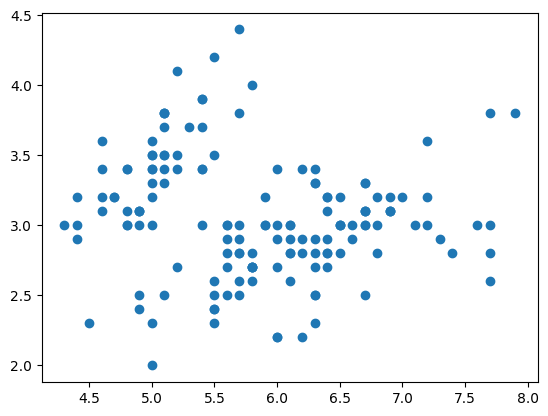

In [ ]:
plt.scatter(spl, spw)
plt.show()

Hiệp phương sai cũng phụ thuộc vào sự biến thiên của từng đại lượng. Để đặc trưng tốt hơn cho riêng "độ biến thiên cùng nhau", người ta thường dùng **hệ số tương quan** (correlation) là hiệp phương sai đã chia cho độ lệch chuẩn của 2 đại lượng.

In [ ]:
covar / (spl.std() * spw.std())

-0.108640121617645

In [ ]:
spl.corr(spw)

-0.1093692499506493

In [ ]:
np.corrcoef(spl, spw)

array([[ 1.        , -0.10936925],
       [-0.10936925,  1.        ]])

In [ ]:
iris.drop("species", axis=1).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


**Bài tập**

1. Tính riêng hệ số tương quan giữa sepal_length với petal_length và vẽ biểu đồ phân tán để đối chiếu.

1. Tính riêng hệ số tương quan giữa sepal_width với petal_length và vẽ biểu đồ phân tán để đối chiếu.